## Instructions {-}

1. You may talk to a friend, discuss the questions and potential directions for solving them. However, you need to write your own solutions and code separately, and not as a group activity. 

2. Write your code in the **Code cells** and your answers in the **Markdown cells** of the Jupyter notebook. Ensure that the solution is written neatly enough to for the graders to understand and follow.

3. Use [Quarto](https://quarto.org/docs/output-formats/html-basics.html) to render the **.ipynb** file as HTML. You will need to open the command prompt, navigate to the directory containing the file, and use the command: `quarto render filename.ipynb --to html`. Submit the HTML file.

4. The assignment is worth 100 points, and is due on **Sunday, 4th February 2024 at 11:59 pm**. 


5. **Five points are properly formatting the assignment**. The breakdown is as follows:
    - Must be an HTML file rendered using Quarto **(1 point)**. *If you have a Quarto issue, you must mention the issue & quote the error you get when rendering using Quarto in the comments section of Canvas, and submit the ipynb file.* 
    - No name can be written on the assignment, nor can there be any indicator of the student’s identity—e.g. printouts of the working directory should not be included in the final submission.  **(1 point)**
    - There aren’t excessively long outputs of extraneous information (e.g. no printouts of entire data frames without good reason, there aren’t long printouts of which iteration a loop is on, there aren’t long sections of commented-out code, etc.) **(1 point)**
    - Final answers to each question are written in the Markdown cells. **(1 point)**
    - There is no piece of unnecessary / redundant code, and no unnecessary / redundant text. **(1 point)**

6.  The maximum possible score in the assigment is 105 + 5 (proper formatting) = 110 out of 100.

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

## 1) Multiple Linear Regression (24 points)

A study was conducted on 97 male patients with prostate cancer who were due to receive a radical prostatectomy (complete removal of the prostate). The **prostate.csv** file contains data on 9 measurements taken from these 97 patients. Each row (observation) represents a patient and each column (variable) represents a measurement. The description of variables can be found here: https://rafalab.github.io/pages/649/prostate.html

### 1a) 
Fit a linear regression model with `lpsa` as the response and all the other variables as the predictors. Print its summary. **(2 points)** Write down the **optimal equation** that predicts `lpsa` using the predictors. **(2 points)**

In [54]:
prostate_data = pd.read_csv("/Users/vaibhavrangan/Downloads/Stat_303-2/Datasets/prostate.csv")

model_prostate = smf.ols('lpsa ~ lcavol + lweight + age + lbph + svi + lcp + gleason + pgg45', data = prostate_data).fit()
model_prostate.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   lpsa   R-squared:                       0.655
Model:                            OLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                     20.86
Date:                Wed, 29 Jan 2025   Prob (F-statistic):           2.24e-17
Time:                        20:00:16   Log-Likelihood:                -99.476
No. Observations:                  97   AIC:                             217.0
Df Residuals:                      88   BIC:                             240.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6693      1.296      0.516      0.607      -1.907       3.246
lcavol         0.5870      0.088      6.677      0.000       0.412       0.762
lweight        0.4545      0.170      2.673      0.009       0.117       0.792
age           -0.0196      0.011     -1.758      0.082      -0.042       0.003
lbph           0.1071      0.058      1.832      0.070      -0.009       0.223
svi            0.7662      0.244      3.136      0.002       0.281       1.252
lcp           -0.1055      0.091     -1.159      0.250      -0.286       0.075
gleason        0.0451      0.157      0.287      0.775      -0.268       0.358
pgg45          0.0045      0.004      1.024      0.309      -0.004       0.013
==============================================================================
Omnibus:                        0.235   Durbin-Watson:                   1.507
Prob(Omnibus):                  0.889   Jarque-Bera (JB):                0.026
Skew:                          -0.017   Prob(JB):                        0.987
Kurtosis:                       3.073   Cond. No.                     1.28e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

lpsa = 0.6693 + 0.5870*lcavol + 0.4545*lweight - 0.0196*age + 0.1071*lbph + 0.7662*svi - 0.1055*lcp + 0.0451*gleason + 0.0045*pgg45

### 1b) 
Is the **overall regression** statistically significant? In other words, is there a statistically significant relationship between the response and at least one predictor? **You need to justify your answer for credit. (2 points)**

Yes, the overall regression is statistically significant because the p-value of the F-statistic (2.24e-17) is less than 0.05. 

### 1c) 
What does the optimal coefficient of `svi` tell us as a numeric output? Make sure you include the predictor, (`svi`) the response (`lpsa`) and the other predictors in your answer. **(2 points)**

The optimal coefficient of svi represents the effect of svi on lpsa, controlling for the other predictors. Holding all other predictors constant, a 1 unit increase in svi increases lpsa by 0.7662 units.

### 1d) 
Check the $p$-values of `gleason` and `age`. Are these predictors statistically significant? **You need to justify your answer for credit. (2 points)**

No, neither predictor is statistically significant because both p-values are greater than 0.05.

### 1e)
Check the 95% Confidence Interval of `age`. How can you relate it to its p-value and statistical significance, which you found in the previous part? **(2 points)**

The 95% confidence interval of age includes 0, implying that it is not statistically significant because the null hypothesis of the coefficient of age being 0 is within the 95% confidence interval. This results in a p-value greater than 0.05, which is what we observe.

### 1f) 
This question requires some thinking, and bringing your 303-1 and 303-2 knowledge together.  

Fit a **simple** linear regression model on `lpsa` against `gleason` and check the $p$-value of `gleason` using the summary. **(2 point)** Did the statistical significance of `gleason` change in the absence of other predictors? **(1 point)** Why or why not? **(3 points)**

**Hints:**

1) You need to compare this model with the Multiple Linear Regression model you created above.
2) Printing a correlation matrix of all the predictors should be useful.

In [55]:
model_gleason = smf.ols('lpsa ~ gleason', data = prostate_data).fit()
model_gleason.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   lpsa   R-squared:                       0.136
Model:                            OLS   Adj. R-squared:                  0.127
Method:                 Least Squares   F-statistic:                     14.97
Date:                Wed, 29 Jan 2025   Prob (F-statistic):           0.000200
Time:                        20:03:04   Log-Likelihood:                -143.96
No. Observations:                  97   AIC:                             291.9
Df Residuals:                      95   BIC:                             297.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.5044      1.035     -1.453      0.149      -3.559       0.550
gleason        0.5898      0.152      3.869      0.000       0.287       0.892
==============================================================================
Omnibus:                        2.099   Durbin-Watson:                   0.245
Prob(Omnibus):                  0.350   Jarque-Bera (JB):                1.526
Skew:                           0.178   Prob(JB):                        0.466
Kurtosis:                       3.501   Cond. No.                         65.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The p-value of gleason is 0.0000, which is less than 0.05, indicating that gleason is statistically significant. This is a change from the multiple linear regression model, where gleason was not statistically significant. This is most likely due to the fact that gleason is correlated with other variables that are statistically significant in affecting lpsa.

In [58]:
# correlation matrix between gleason and other predictors
prostate_data.corr()

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
lcavol,1.000000,0.194128,0.225000,0.027350,0.538845,0.675311,0.432417,0.433652,0.734460
lweight,0.194128,1.000000,0.307525,0.434932,0.108778,0.100239,-0.001283,0.050846,0.354122
age,0.225000,0.307525,1.000000,0.350186,0.117658,0.127668,0.268892,0.276112,0.169593
lbph,0.027350,0.434932,0.350186,1.000000,-0.085843,-0.006999,0.077820,0.078460,0.179810
svi,0.538845,0.108778,0.117658,-0.085843,1.000000,0.673111,0.320412,0.457648,0.566218
lcp,0.675311,0.100239,0.127668,-0.006999,0.673111,1.000000,0.514830,0.631528,0.548813
gleason,0.432417,-0.001283,0.268892,0.077820,0.320412,0.514830,1.000000,0.751905,0.368987
pgg45,0.433652,0.050846,0.276112,0.078460,0.457648,0.631528,0.751905,1.000000,0.422316
lpsa,0.734460,0.354122,0.169593,0.179810,0.566218,0.548813,0.368987,0.422316,1.000000


As we can observe from the correlation matrix, gleason is correlated with svi and lcavol, which are both statistically significant. The correlation between gleason and two statistically significant predictors explains why gleason is not statistically significant in the multiple linear regression model but is significant in the simple linear regression model.

### 1g) 
Predict the `lpsa` of a **65 year old** man with `lcavol` = 1.35, `lweight` = 3.65, `lbph` = 0.1, `svi` = 0.22, `lcp` = -0.18, `gleason` = 6.75, and `pgg45` = 25. Find the 95% confidence and prediction intervals as well. **(2 points)**

In [57]:
lpsa_pred = model_prostate.get_prediction({
    'lcavol': 1.35,
    'lweight': 3.65,
    'age': 65,
    'lbph': 0.1,
    'svi': 0.22,
    'lcp': -0.18,
    'gleason': 6.75,
    'pgg45': 25
})

print(lpsa_pred.summary_frame()["mean"][0])
print(lpsa_pred.summary_frame()["mean_ci_lower"][0], lpsa_pred.summary_frame()["mean_ci_upper"][0])
print(lpsa_pred.summary_frame()["obs_ci_lower"][0], lpsa_pred.summary_frame()["obs_ci_upper"][0])

2.46028780190132
2.3151126235425927 2.6054629802600475
1.0449953936887166 3.875580210113924


### 1h) 
In the Multiple Linear Regression model with all the predictors, you should see a total of five predictors that appear to be statistically insignificant. Why is it not a good idea to directly conclude that all of them are statistically insignificant? **(2 points)** Implement the additional test that concludes the statistical insignificance of all five predictors. **(2 points)**

**Hint:** `f_test()` method

It's not a good idea to directly conclude that all 5 are statistically insignificant because some of the predictors might be correlated with one another (which some are), artificially inflating standard errors and p-values.

In [60]:
hypothesis = "(age = 0, lbph = 0, lcp = 0, gleason = 0, pgg45 = 0)"
f_test = model_prostate.f_test(hypothesis)
print(f_test)

<F test: F=1.443386923695784, p=0.21673336075540298, df_denom=88, df_num=5>


The p-value of the f-test (0.218) is greater than 0.05, indicating that all 5 predictors are statistically insignificant.

## 2) Multiple Linear Regression with Variable Transformations (22 points)

The **infmort.csv** file has the infant mortality data of different countries in the world. The `mortality` column represents the infant mortality rate with "deaths per 1000 infants" as the unit. The `income` column represents the per capita income in USD. The other columns should be self-explanatory. (This is an old dataset, as can be seen from some country names.)

In [6]:
infmort_data = pd.read_csv("/Users/vaibhavrangan/Downloads/Stat_303-2/Datasets/infmort.csv")


### 2a) 
Start your analysis by creating (i) a boxplot of log(`mortality`) for each `region` and (ii) a boxplot of `income` for each `region`. Note that the `region` column has the continent names. **(3 points)**

**Note:** You need to use np.log, which is the natural log. This is to better distinguish the mortality values.

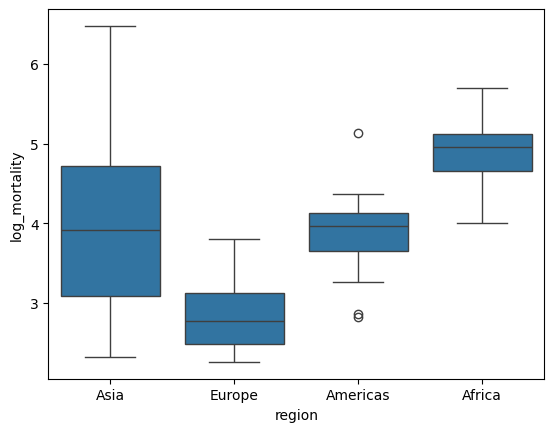

In [7]:
infmort_data['log_mortality'] = np.log(infmort_data['mortality'])
sns.boxplot(x="region", y="log_mortality", data=infmort_data);


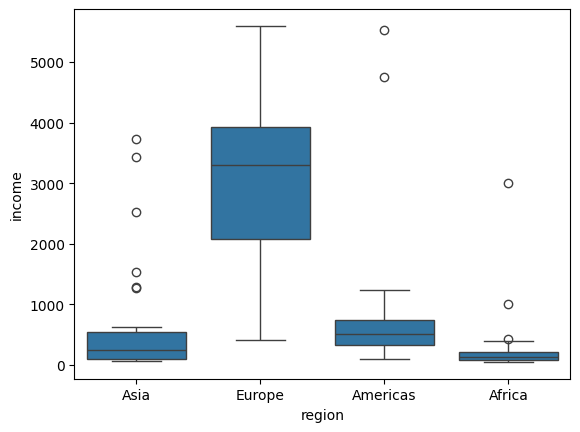

In [8]:
sns.boxplot(x="region", y = "income", data = infmort_data);


### 2b) 
In the previous part, you should see that Europe has the lowest infant mortality rate on average, but it also has the highest per capita income on average. Our goal is to see if Europe still has the lowest mortality rate if we remove the effect of income. We will try to find an answer for the rest of this question.

Create four scatter plots: (i) `mortality` against `income`, (ii) log(`mortality`) against `income`, (iii) `mortality` against log(`income`), and (iv) log(`mortality`) against log(`income`). **(3 points)** Based on the plots, create an appropriate model to predict the mortality rate as a function of per capita income. Print the model summary. **(2 points)**

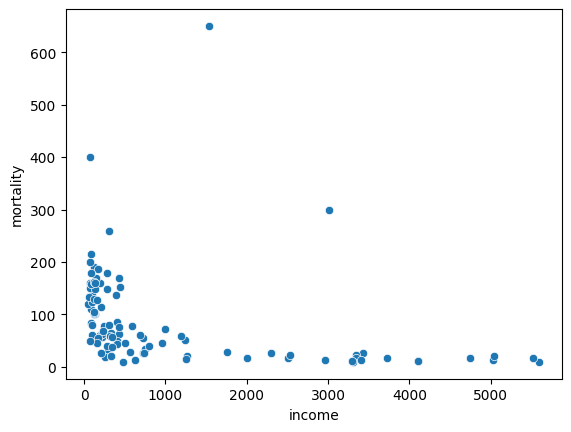

In [9]:
# mortality against income scatterplot
sns.scatterplot(x = "income", y = "mortality", data = infmort_data);

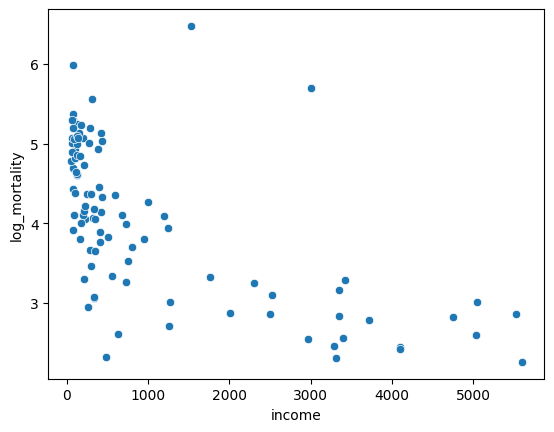

In [10]:
sns.scatterplot(x = "income", y = "log_mortality", data = infmort_data);

In [11]:
infmort_data['log_income'] = np.log(infmort_data['income'])

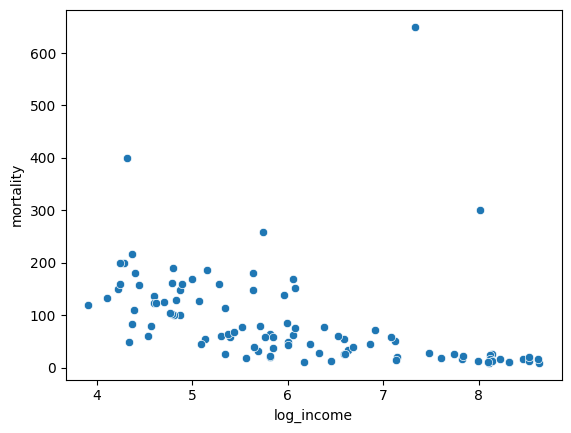

In [12]:
sns.scatterplot(x = "log_income", y = "mortality", data = infmort_data);

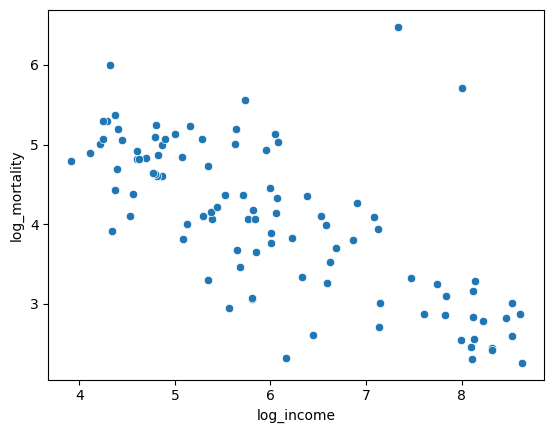

In [13]:
sns.scatterplot(x = "log_income", y = "log_mortality", data = infmort_data);

In [14]:
inc_mort_model = smf.ols('log_mortality ~ log_income', data = infmort_data).fit()
inc_mort_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          log_mortality   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     99.84
Date:                Wed, 29 Jan 2025   Prob (F-statistic):           1.14e-16
Time:                        16:55:11   Log-Likelihood:                -104.34
No. Observations:                 101   AIC:                             212.7
Df Residuals:                      99   BIC:                             217.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.1458      0.317     22.575      0.000       6.518       7.774
log_income    -0.5118      0.051     -9.992      0.000      -0.613      -0.410
==============================================================================
Omnibus:                       38.668   Durbin-Watson:                   1.898
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              129.408
Skew:                           1.255   Prob(JB):                     7.93e-29
Kurtosis:                       7.945   Cond. No.                         29.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 2c) 
Update the model you created in the previous part by adding `region` as a predictor. Print the model summary. **(2 points)**

In [15]:
region_inc_mort_model = smf.ols('log_mortality ~ log_income+C(region)', data = infmort_data).fit()
region_inc_mort_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          log_mortality   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.600
Method:                 Least Squares   F-statistic:                     38.55
Date:                Wed, 29 Jan 2025   Prob (F-statistic):           3.29e-19
Time:                        16:55:11   Log-Likelihood:                -91.189
No. Observations:                 101   AIC:                             192.4
Df Residuals:                      96   BIC:                             205.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 6.4030      0.358     17.871      0.000       5.692       7.114
C(region)[T.Americas]    -0.6022      0.190     -3.166      0.002      -0.980      -0.225
C(region)[T.Asia]        -0.7233      0.163     -4.431      0.000      -1.047      -0.399
C(region)[T.Europe]      -1.2028      0.259     -4.647      0.000      -1.717      -0.689
log_income               -0.2994      0.067     -4.441      0.000      -0.433      -0.166
==============================================================================
Omnibus:                       44.959   Durbin-Watson:                   1.847
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              174.758
Skew:                           1.428   Prob(JB):                     1.13e-38
Kurtosis:                       8.777   Cond. No.                         42.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 2d) 
Use the model developed in the previous part to compute a new `adjusted_mortality` variable for each observation in the data. **(5 points)** Adjusted mortality rate is the mortality rate after removing the estimated effect of income. You need to calculate it with the following steps:

- Multiply the (transformed) income column with its optimal coefficient. This is the estimated effect of income.
- Subtract the product from the (transformed) response column. This removes the estimated effect of income.
- You may need to do a inverse transformation to calculate the actual adjusted mortality rate values.

Make a boxplot of log(`adjusted_mortality`) for each `region`. **(2 points)**

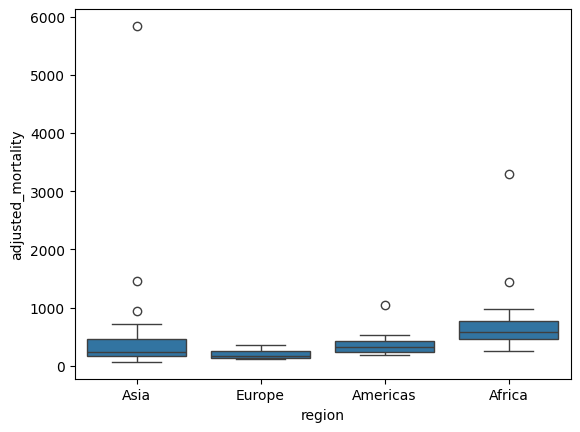

In [16]:
coefficients = region_inc_mort_model.params
infmort_data["adjusted_mortality"] = np.exp(infmort_data["log_mortality"] - infmort_data["log_income"]*coefficients["log_income"])

sns.boxplot(x = "region", y = "adjusted_mortality", data = infmort_data);

### 2e) 
Using the plots in parts **a** and **d**, answer the following questions: 

(i) Does Europe still have the lowest mortality rate on average after removing the effect of income? 

(ii) How did the distribution of values among different continents change after removing the effect of income? How did the comparison of different continents change? Does any non-European country have a lower mortality rate than all the European countries after removing the effect of income?

**(5 points)**

Yes, Europe still has the lowest average mortality rate after removing the effect of income. However, there is at least an Asian nation with a lower mortality rate than all the European countries after removing the effect of income. The relative rankings of the continents are mostly unchanged, except for the Americas having a slightly higher mortality rate than Asia after removing the effect of income.

## 3) Variable Transformations and Interactions (38 points)

The **soc_ind.csv** dataset contains many social indicators of a number of countries. Each row is a country and each column is a social indicator. The column names should be clear on what the variables represent. The GDP per capita will be the response variable throughout this question.

In [31]:
socind_data = pd.read_csv("/Users/vaibhavrangan/Downloads/Stat_303-2/Datasets/soc_ind.csv")

### 3a) 
Using correlations, find out the most useful predictor for a simple linear regression model with `gdpPerCapita` as the response. You can ignore categorical variables for now. Let that predictor be $P$. **(2 points)**

In [18]:
corr_matrix = socind_data.select_dtypes(include=['number']).corr()
gdp_corr = corr_matrix["gdpPerCapita"].drop("gdpPerCapita")
p = gdp_corr.idxmax()
print(p)

lifeFemale


### 3b) 
Create a scatterplot of `gdpPerCapita` vs $P$. Does the relationship between `gdpPerCapita` and $P$ seem linear or non-linear? **(2 points)**

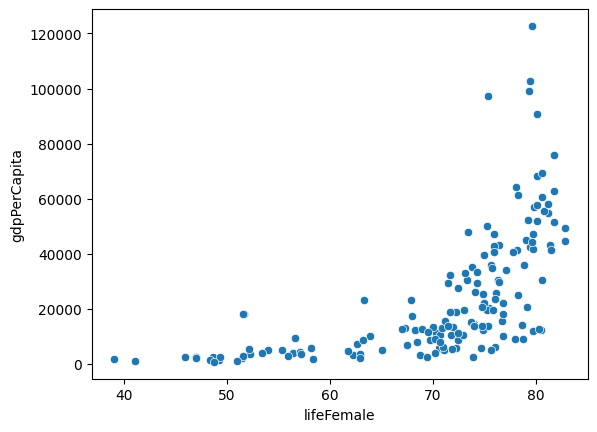

In [19]:
sns.scatterplot(x = p, y = "gdpPerCapita", data = socind_data);

Data appears nonlinear

### 3c) 
If the relationship in the previous part is non-linear, create three models: 

- Only with $P$
- With $P$ and its quadratic term
- With $P$, its quadratic term and its cubic term

**(2x3 = 6 points)**

Compare the $R$-squared values of the models. **(2 points)**

In [20]:
only_p = smf.ols('gdpPerCapita ~ lifeFemale', data = socind_data).fit()
print(only_p.rsquared)

quad_p = smf.ols('gdpPerCapita ~ lifeFemale + I(lifeFemale**2)', data=socind_data).fit()
print(quad_p.rsquared)

cubic_p = smf.ols('gdpPerCapita ~  lifeFemale + I(lifeFemale**2) + I(lifeFemale**3)', data=socind_data).fit()
print(cubic_p.rsquared)

0.3648504777962376
0.4962409765820259
0.5216581673999947


### 3d) 
On the same figure:

- create the scatterplot in part b.
- plot the linear regression line (only using $P$)
- plot the polynomial regression curve that includes the quadratic and cubic terms.
- add a legend to distinguish the linear and cubic fits.

**(6 points)**

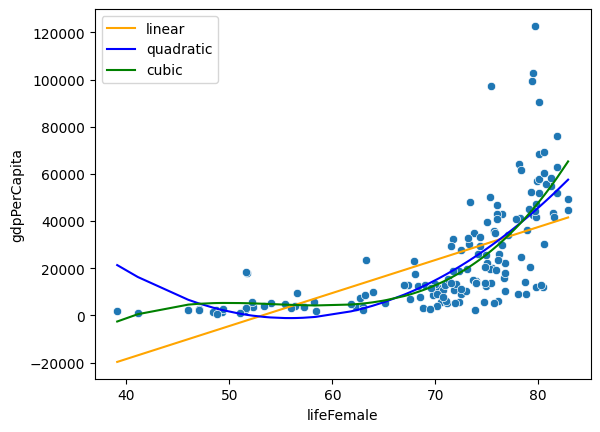

In [21]:
y_pred_linear = only_p.predict(socind_data)
y_pred_quad = quad_p.predict(socind_data)
y_pred_cubic = cubic_p.predict(socind_data)

sns.scatterplot(x = p, y = "gdpPerCapita", data = socind_data);
sns.lineplot(x = socind_data[p], y = y_pred_linear, color = "orange", label = "linear")
sns.lineplot(x = socind_data[p], y = y_pred_quad, color = "blue", label = "quadratic")
sns.lineplot(x = socind_data[p], y = y_pred_cubic, color = "green", label = "cubic")

plt.legend()

### 3e) 
Develop a model to predict `gdpPerCapita` using $P$ and `continent` as predictors. (No higher-order terms.) 

1. Which continent creates the baseline? **(2 points)** Write down its equation. **(2 points)** 

2. For a given value of $P$, are there any continents that **do not** have a statistically significant difference of predicted `gdpPerCapita` from the baseline continent? If yes, then which ones, and why? If no, then why not? You need to justify your answers for credit. **(4 points)**

In [22]:
p_and_continent = smf.ols('gdpPerCapita ~ lifeFemale + C(continent)', data = socind_data).fit()
p_and_continent.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           gdpPerCapita   R-squared:                       0.508
Model:                            OLS   Adj. R-squared:                  0.488
Method:                 Least Squares   F-statistic:                     25.43
Date:                Wed, 29 Jan 2025   Prob (F-statistic):           1.28e-20
Time:                        16:55:11   Log-Likelihood:                -1723.6
No. Observations:                 155   AIC:                             3461.
Df Residuals:                     148   BIC:                             3483.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                     -7.208e+04   1.14e+04     -6.305      0.000   -9.47e+04   -4.95e+04
C(continent)[T.Asia]           1324.7980   4805.099      0.276      0.783   -8170.667    1.08e+04
C(continent)[T.Europe]         9167.0203   5785.650      1.584      0.115   -2266.134    2.06e+04
C(continent)[T.North America] -1.446e+04   5947.502     -2.431      0.016   -2.62e+04   -2704.270
C(continent)[T.Oceania]       -1.429e+04   6063.764     -2.357      0.020   -2.63e+04   -2307.304
C(continent)[T.South America] -1.329e+04   6462.516     -2.056      0.042   -2.61e+04    -516.198
lifeFemale                     1393.4213    194.062      7.180      0.000    1009.931    1776.911
==============================================================================
Omnibus:                       67.873   Durbin-Watson:                   1.942
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              231.081
Skew:                           1.701   Prob(JB):                     6.63e-51
Kurtosis:                       7.920   Cond. No.                         721.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Africa creates the baseline. The equation relating gdpPerCapita to lifeFemale for Africa is:
gdpPerCapita = -7.208e+04 + 1393.4213*lifeFemale

For a given value of lifeFemale, Asia and Europe do not have a statistically significant difference of predicted gdpPerCapita from the baseline continent because the p-value for both continents is greater than 0.05.

### 3f) 
The model developed in the previous part has a limitation. It assumes that the increase in predicted `gdpPerCapita` with a unit increase in $P$ does not depend on the `continent`. 

Eliminate this limitation by including the interaction of `continent` with $P$ in the model. Print the model summary of the model with interactions. **(2 points)** Which continent has the closest increase in predicted `gdpPerCapita` to the baseline continent with a unit increase in $P$. Which continent has the furthest? **You need to justify your answers for credit.** **(5 points)**

In [23]:
interaction_model = smf.ols('gdpPerCapita ~ lifeFemale + C(continent) + lifeFemale*C(continent)', data = socind_data).fit()
interaction_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           gdpPerCapita   R-squared:                       0.605
Model:                            OLS   Adj. R-squared:                  0.574
Method:                 Least Squares   F-statistic:                     19.90
Date:                Wed, 29 Jan 2025   Prob (F-statistic):           7.99e-24
Time:                        16:55:11   Log-Likelihood:                -1706.6
No. Observations:                 155   AIC:                             3437.
Df Residuals:                     143   BIC:                             3474.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                -1.723e+04   1.53e+04     -1.129      0.261   -4.74e+04    1.29e+04
C(continent)[T.Asia]                     -1.094e+05   2.63e+04     -4.156      0.000   -1.61e+05   -5.74e+04
C(continent)[T.Europe]                   -2.774e+05   6.63e+04     -4.185      0.000   -4.08e+05   -1.46e+05
C(continent)[T.North America]              -6.6e+04   4.88e+04     -1.352      0.178   -1.62e+05    3.05e+04
C(continent)[T.Oceania]                  -1.367e+05   5.78e+04     -2.364      0.019   -2.51e+05   -2.24e+04
C(continent)[T.South America]            -7830.3082   8.18e+04     -0.096      0.924   -1.69e+05    1.54e+05
lifeFemale                                 428.5595    264.214      1.622      0.107     -93.711     950.830
lifeFemale:C(continent)[T.Asia]           1755.1049    400.782      4.379      0.000     962.882    2547.328
lifeFemale:C(continent)[T.Europe]         3944.6364    869.916      4.535      0.000    2225.080    5664.193
lifeFemale:C(continent)[T.North America]   921.1328    667.359      1.380      0.170    -398.031    2240.297
lifeFemale:C(continent)[T.Oceania]        1898.4382    812.766      2.336      0.021     291.851    3505.026
lifeFemale:C(continent)[T.South America]   135.3138   1134.388      0.119      0.905   -2107.022    2377.650
==============================================================================
Omnibus:                       73.348   Durbin-Watson:                   1.900
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              290.376
Skew:                           1.785   Prob(JB):                     8.82e-64
Kurtosis:                       8.676   Cond. No.                     5.23e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.23e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

South America has the closest increase in predicted gdpPerCapita to Africa with a unit increase in lifeFemale because it has the lowest coefficient of all the continents' respective interaction terms with lifeFemale. Europe has the largest such coefficient so it has the furthest increase in predicted gdpPerCapita to Africa with a unit increase in lifeFemale.

### 3g) 
Using the model developed in the previous part, plot the regression lines of all the continents on the same figure. Put `gdpPerCapita` on the y-axis and $P$ on the x-axis. **(4 points)** Use a legend to color-code the continents. **(1 point)**

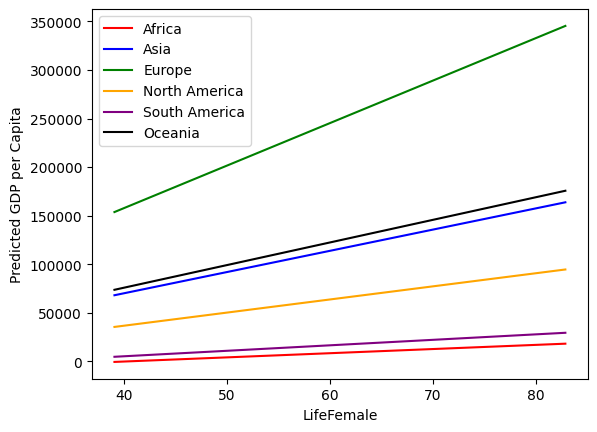

In [24]:
x = np.linspace(socind_data['lifeFemale'].min(), socind_data['lifeFemale'].max(), 100)
sns.lineplot(x = x, y = interaction_model.params["Intercept"] + interaction_model.params["lifeFemale"]*x, label = "Africa", color = "red")
sns.lineplot(x = x, y = interaction_model.params["Intercept"] + interaction_model.params["lifeFemale"]*x + interaction_model.params["lifeFemale:C(continent)[T.Asia]"]*x, label = "Asia", color = "blue")
sns.lineplot(x = x, y = interaction_model.params["Intercept"] + interaction_model.params["lifeFemale"]*x + interaction_model.params["lifeFemale:C(continent)[T.Europe]"]*x, label = "Europe", color = "green")
sns.lineplot(x = x, y = interaction_model.params["Intercept"] + interaction_model.params["lifeFemale"]*x + interaction_model.params["lifeFemale:C(continent)[T.North America]"]*x, label = "North America", color = "orange")
sns.lineplot(x = x, y = interaction_model.params["Intercept"] + interaction_model.params["lifeFemale"]*x + interaction_model.params["lifeFemale:C(continent)[T.South America]"]*x, label = "South America", color = "purple")
sns.lineplot(x = x, y = interaction_model.params["Intercept"] + interaction_model.params["lifeFemale"]*x + interaction_model.params["lifeFemale:C(continent)[T.Oceania]"]*x, label = "Oceania", color = "black")
plt.legend()
plt.xlabel('LifeFemale')
plt.ylabel('Predicted GDP per Capita');

## 4) Prediction with Sklearn (21 points)

### Instructions

1. Read the **soc_ind.csv** dataset and use the `Index` column as the index of the dataframe.
2. Drop the `geographic_location` and `country` columns since they are not useful for our prediction.
3. We will use **only `sklearn` and `pandas`** libraries in this task.
4. **gdpPerCapita** is the response (target) variable.  
   **(2 points)**  
5. All other columns (except `Index`, `geographic_location`, and `country`) will serve as predictors.  
   **(2 points)**  
6. The `continent` column must be one-hot-encoded using `OneHotEncoder`.  
   **(5 points)**
7. Output the encoded dummy variables (feature names) to confirm successful encoding.  
   **(2 points)**  
8. Train a `LinearRegression` model. Split the dataset into a **training set (90%)** and a **test set (10%)**.  
   - Set `random_state=3` for reproducibility.  
   **(3 points)**  
9. Calculate the **RMSE** and **R-squared** for both the training set and the test set.  
   **(3 points)**  
10. Discuss whether your model shows signs of **overfitting** or **underfitting**.  
    **(3 points)**

In [46]:
soc_ind_data = pd.read_csv("/Users/vaibhavrangan/Downloads/Stat_303-2/Datasets/soc_ind.csv")
soc_ind_data = soc_ind_data.set_index(soc_ind_data["Index"])
soc_ind_data.drop(["Index", 'country', 'geographic_location'], axis = 1, inplace = True)
soc_ind_data = pd.get_dummies(soc_ind_data, columns = ["continent"], drop_first = True)
soc_ind_data = soc_ind_data.astype(float)
print(soc_ind_data.columns)


Index(['economicActivityFemale', 'economicActivityMale', 'gdpPerCapita',
       'illiteracyFemale', 'illiteracyMale', 'infantMortality', 'lifeFemale',
       'lifeMale', 'continent_Asia', 'continent_Europe',
       'continent_North America', 'continent_Oceania',
       'continent_South America'],
      dtype='object')


In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

model = LinearRegression()

train, test = train_test_split(soc_ind_data, test_size=0.1, random_state=3)

x_train = train.drop(["gdpPerCapita"], axis = 1)
y_train = train[["gdpPerCapita"]]

x_test = test.drop(["gdpPerCapita"], axis = 1)
y_test = test[["gdpPerCapita"]]

model.fit(x_train, y_train)


print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

# print train rmse
y_train_pred = model.predict(x_train)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
print(train_rmse)

# print test rmse
y_test_pred = model.predict(x_test)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(test_rmse)



0.5697416274348598
0.40870207503704936
14589.152192514171
23368.73909817339


The test R^2 is less than the train R^2 while the test RMSE is greater than the train RMSE, indicating that the model is overfitting the data. The model seems to be fitting the noise in the train data and applying it to the test data, resulting in a lower R^2 and higher RMSE on the test data.